In [50]:
#Bring in some useful libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pylab

In [9]:
#Read data
df = pd.read_csv('World_Happiness_2016.csv')

In [10]:
#Review Attributes
list(df.columns.values)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [35]:
print df

                  Country                           Region  Happiness Rank  \
0                 Denmark                   Western Europe               1   
1             Switzerland                   Western Europe               2   
2                 Iceland                   Western Europe               3   
3                  Norway                   Western Europe               4   
4                 Finland                   Western Europe               5   
5                  Canada                    North America               6   
6             Netherlands                   Western Europe               7   
7             New Zealand        Australia and New Zealand               8   
8               Australia        Australia and New Zealand               9   
9                  Sweden                   Western Europe              10   
10                 Israel  Middle East and Northern Africa              11   
11                Austria                   Western Europe      

In [119]:
#Strip white space from string attributes
df['Country'] = df['Country'].apply(lambda x: x.strip())
df['Region'] = df['Region'].apply(lambda x: x.strip())
print df['Country']
print df['Region']

0                   Denmark
1               Switzerland
2                   Iceland
3                    Norway
4                   Finland
5                    Canada
6               Netherlands
7               New Zealand
8                 Australia
9                    Sweden
10                   Israel
11                  Austria
12            United States
13               Costa Rica
14              Puerto Rico
15                  Germany
16                   Brazil
17                  Belgium
18                  Ireland
19               Luxembourg
20                   Mexico
21                Singapore
22           United Kingdom
23                    Chile
24                   Panama
25                Argentina
26           Czech Republic
27     United Arab Emirates
28                  Uruguay
29                    Malta
               ...         
127                 Senegal
128                Bulgaria
129              Mauritania
130                Zimbabwe
131                 

In [14]:
#Check for missing values (this data was very clean already so I messed with it a bit)
missing_coun = df['Country'].isnull().sum()
print "Missing Country"
print missing_coun
missing_reg = df['Region'].isnull().sum()
print "Missing Region"
print missing_reg
missing_rank = df['Happiness Rank'].isnull().sum()
print "Missing Rank"
print missing_rank
missing_score = df['Happiness Score'].isnull().sum()
print "Missing Score"
print missing_score

Missing Country
0
Missing Region
0
Missing Rank
0
Missing Score
0


In [13]:
#Since Happiness Score is an aggregate value, I'll sum the other numerical values to replace the missing scores.  I also considered removing null lines
df['Happiness Score']=df['Happiness Score'].fillna(df['Economy (GDP per Capita)'] + df['Family'] + df['Health (Life Expectancy)'] + \
df['Freedom'] + df['Trust (Government Corruption)'] + df['Generosity'] +df['Dystopia Residual'])

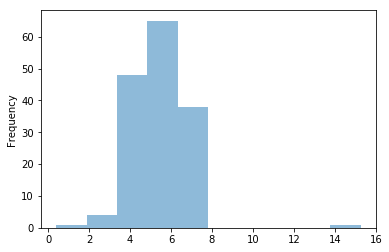

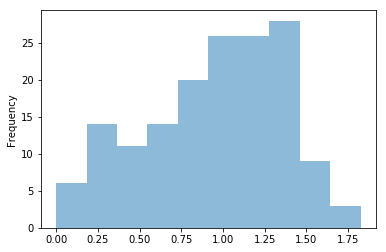

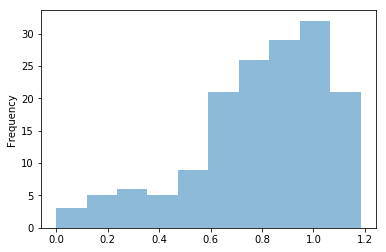

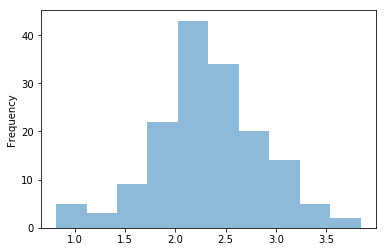

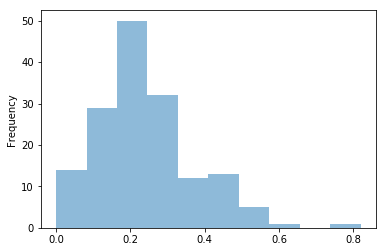

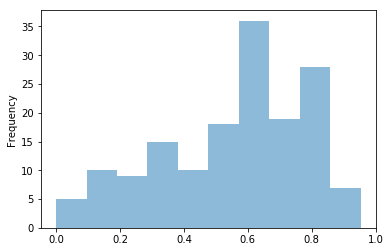

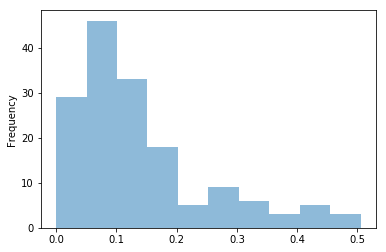

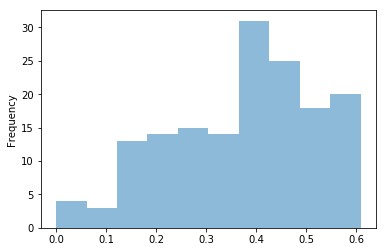

In [15]:
#Check for outliers (Happiness Score looks to have some outliers)
plt.figure();
df["Happiness Score"].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Economy (GDP per Capita)'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Family'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Dystopia Residual'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Generosity'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Health (Life Expectancy)'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Trust (Government Corruption)'].plot.hist(alpha=0.5)
plt.show()
plt.figure();
df['Freedom'].plot.hist(alpha=0.5)
plt.show()

In [16]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.420407,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.441731,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,0.395000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.389000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.324000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,15.245000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [43]:
df['Happiness Score'].plot(kind='box')

In [32]:
#This was the only line I could not get to run.  I tried all many different combinations or () and different syntax. 
#My goal was to identify outliers by listing Countries with Happiness Scores outside of 3 standard deviations of the mean Happiness Score
for x in df['Country']:
     if (df['Happiness Score'] > df['Happiness Score'].mean() + 3 * df['Happiness Score'].std()) | (df['Happiness Score'] < df['Happiness Score'].mean() - 3 * df['Happiness Score'].std()):
        print x

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [33]:
#Assign Descriptive Variable to Happiness Score
df.ix[df['Happiness Score'] >= df['Happiness Score'].quantile(0.75), 'Happiness_Desc'] = "Happy"
df.ix[(df['Happiness Score'] >= df['Happiness Score'].quantile(0.50)) & (df['Happiness Score'] < df['Happiness Score'].quantile(0.75)), 'Happiness_Desc'] = "Eh"
df.ix[(df['Happiness Score'] >= df['Happiness Score'].quantile(0.25)) & (df['Happiness Score'] < df['Happiness Score'].quantile(0.50)), 'Happiness_Desc'] = "Meh..."
df.ix[df['Happiness Score'] < df['Happiness Score'].quantile(0.25), 'Happiness_Desc'] = "Not Super Duper Happy"

In [34]:
#Make dummy variables for World Region
# create nine dummy variables using get_dummies, then exclude the first dummy column
region_dummies = pd.get_dummies(df.Region, prefix='Region').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame
df = pd.concat([df, region_dummies], axis=1)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Region_Western Europe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,1,0,0,0,0,0,0,0,0,1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,1,0,0,0,0,0,0,0,0,1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,1,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,1,0,0,0,0,0,0,0,0,1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,1,0,0,0,0,0,0,0,0,1


In [53]:
#Additional research could be to look at how happiness is connected to population totals
#Could seperate countries into groups based on region and then see if there is a trend between population and happiness
#Possible that it is easier to make people happy when you have a smaller population to worry about

Wpop = pd.read_excel('World_Pop.xlsx')

In [54]:
print Wpop

                                          Country Name    Population
0                                                Aruba  1.038890e+05
1                                              Andorra  7.047300e+04
2                                          Afghanistan  3.252656e+07
3                                               Angola  2.502197e+07
4                                              Albania  2.889167e+06
5                                           Arab World  3.920223e+08
6                                 United Arab Emirates  9.156963e+06
7                                            Argentina  4.341676e+07
8                                              Armenia  3.017712e+06
9                                       American Samoa  5.553800e+04
10                                 Antigua and Barbuda  9.181800e+04
11                                           Australia  2.378117e+07
12                                             Austria  8.611088e+06
13                                

In [39]:
#Merge the two data sets for all countries included in both files
merged = df.merge(Wpop, left_on="Country", right_on="Country Name")
merged.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Country Name,Population
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,0,0,0,0,0,0,0,1,Denmark,5676002.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,0,0,0,0,0,0,0,1,Switzerland,8286976.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,0,0,0,0,0,0,0,1,Iceland,330823.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,0,0,0,0,0,0,0,1,Norway,5195921.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,0,0,0,0,0,0,0,1,Finland,5482013.0


In [55]:
#here's where I would break out the countries into regional groups and plot happiness score and population.  I had some trouble with this part.
x = df['Population']
y = df['Happiness Score']

plt.pyplot.scatter(x,y)
plt.pyplot.show()

KeyError: 'Population'